In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random 
import torch
from torch.autograd import Variable
import torch.nn
import math


In [263]:
images=np.load('data/images.npy')
labels=np.load('data/labels.npy')
labels=labels.astype(int)
labels[labels!=0]=-1
labels[labels==0]=1
labels[labels==-1]=0


10000


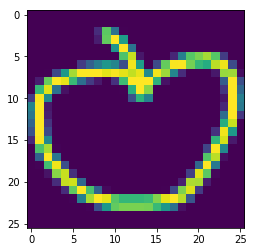

In [264]:
apples=images[labels==1]
print(len(apples))
plt.imshow(apples[0])


In [265]:
shape_images_flat=(images.shape[0],images.shape[1]*images.shape[2])
images_flat=np.ndarray(shape=shape_images_flat)
for index in range(len(images)):
    images_flat[index]=images[index].flat
images=(images_flat-images_flat.mean())/images.std()

In [266]:
train_images=images[0:40000]
train_labels=labels[0:40000]

validation_images=images[40000:45000]
validation_labels=labels[40000:45000]

test_images=images[45000:50000]
test_labels=labels[45000:50000]

In [267]:
def sigmoid(x):  
    return math.exp(-np.logaddexp(0, -x))

In [330]:
def accuracy(y, y_hat):
    """Compute accuracy.
    Args:
    y: A 1-D int NumPy array.
    y_hat: A 1-D int NumPy array.
    Returns:
    A float, the fraction of time y[i] == y_hat[i].
    """
   
    a=(y==y_hat)
    return a.astype(np.float).mean()

In [331]:
def predict_nn(images,\
            input_weights,input_bias_weight,\
            hidden_weights,hidden_bias_weight):
    
    images=np.asmatrix(images)
    input_weights=np.asmatrix(input_weights)
    hidden_weights=np.asmatrix(hidden_weights)
    
    first_layer=images*input_weights.T
    # first_layer+=input_bias_weight
    
    vfunc = np.vectorize(sigmoid)
    
    output=vfunc(first_layer)*hidden_weights
    # hidden_bias_weight
    output[output>0]=1
    output[output<=0]=0
    return output

    


In [376]:
training_accuracy_list=[]
validation_accuracy_list=[]
def compute_accuracy_graph(input_weights,input_bias_weight,hidden_weights,hidden_bias_weight):
    train_images_len=len(train_images)
    train_shuffler_list=list(range(0, train_images_len))
    random.shuffle(train_shuffler_list)    
    shuffled_train_images=train_images[train_shuffler_list]
    shuffled_train_labels=train_labels[train_shuffler_list]
    
    shuffled_train_images_used=shuffled_train_images[0:1000]
    shuffled_train_labels_used=shuffled_train_labels[0:1000]
    
    #d_train=shuffled_train_images_used.dot(W)
    d_train = predict_nn(shuffled_train_images_used,\
            input_weights,input_bias_weight,\
            hidden_weights,hidden_bias_weight)
    
    
    ac_train=accuracy(shuffled_train_labels_used,d_train)
    training_accuracy_list.append(ac_train)
    

    validation_images_len=len(validation_images)
    validation_shuffler_list=list(range(0, validation_images_len))
    random.shuffle(validation_shuffler_list)    
    shuffled_validation_images=validation_images[validation_shuffler_list]
    shuffled_validation_labels=validation_labels[validation_shuffler_list]  
    
    shuffled_validation_images_used=shuffled_validation_images[0:5000]
    shuffled_validation_labels_used=shuffled_validation_labels[0:5000]
    
    #d_validation=shuffled_validation_images_used.dot(W)
    
    d_validation = predict_nn(shuffled_validation_images_used,\
            input_weights,input_bias_weight,\
            hidden_weights,hidden_bias_weight)
    
    ac_validation=accuracy(shuffled_validation_labels_used,d_validation)
    validation_accuracy_list.append(ac_validation)
    
    

# Neural Network Code

In [377]:
I=1
learning_rate=.00001

In [378]:
X=train_images
Y=train_labels
number_of_images=10000
number_of_hidden_units=

W_tensor=torch.DoubleTensor(number_of_hidden_units,X.shape[1]).uniform_(-1, 1)
input_bias_weight=torch.DoubleTensor(1).uniform_(-1, 1)

# make input bias and input weigths variables
input_bias_weight=Variable(input_bias_weight,requires_grad=True)
W_tensor=Variable(W_tensor,requires_grad=True)

a_tensor=torch.DoubleTensor(number_of_hidden_units,1).uniform_(-1, 1)
hidden_bias_weight=torch.DoubleTensor(1).uniform_(-1, 1)
# make hidden bias and hidden weigths variables
hidden_bias_weight=Variable(hidden_bias_weight,requires_grad=True)
a_tensor=Variable(a_tensor,requires_grad=True)

# print(bias_weight)
# print(W_tensor[0])
# print(W_tensor.size())

for epoch in range(0,I):   
    for i in range(0,number_of_images):
        
        #forward propogation part
        x_tensor=torch.from_numpy(X[i])
        x_tensor=torch.unsqueeze(x_tensor, 0)
        x_tensor=Variable(x_tensor,requires_grad=False)
        
        w_x=torch.mm(W_tensor,x_tensor.t())
        w_x=torch.sigmoid(w_x)
        
        a_w_x=torch.mm(a_tensor.t(),w_x)
        prob=torch.sigmoid(a_w_x)
        
        esp1, esp2 = 1e-9,1e9
        J=(float(Y[i]))*torch.log(prob.clamp(esp1,esp2))+(1-float(Y[i]))*torch.log((1-prob).clamp(esp1,esp2))
        J.backward()

        #back propogation part
        W_tensor.data += learning_rate * W_tensor.grad.data
        # input_bias_weight.data += learning_rate * input_bias_weight.grad.data

        a_tensor.data += learning_rate * a_tensor.grad.data
        # hidden_bias_weight.data += learning_rate * hidden_bias_weight.grad.data
        
        if(i%100==0):
            compute_accuracy_graph(W_tensor.data.numpy(),input_bias_weight.data.numpy(),\
                                   a_tensor.data.numpy(),hidden_bias_weight.data.numpy())
        if(i%1000==0):  
            print(J)
        
        
        #shape sanity checks
        # print(w_x.size())
        # print(a_w_x.size())
    print(J)  

weights=(W_tensor.data.numpy(),input_bias_weight.data.numpy(),\
                                   a_tensor.data.numpy(),hidden_bias_weight.data.numpy())

SyntaxError: invalid syntax (<ipython-input-378-624c8e378405>, line 4)

In [ ]:
X=test_images
y=test_labels
d=predict_nn(test_images,weights[0],weights[1],weights[2],weights[3])
ac=accuracy(y,d)
print(ac)


1


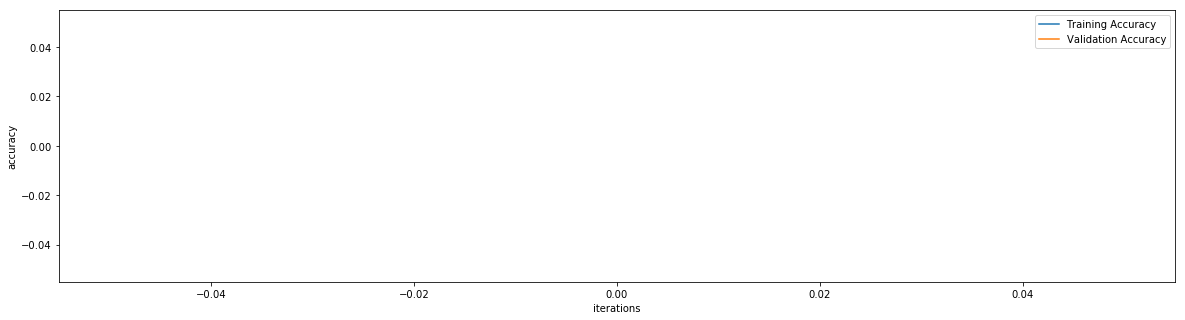

In [379]:
print(y.max())
plt.figure(figsize=(20, 5))
plt.xlabel('iterations')
plt.ylabel('accuracy')
training_accuracy_line,=plt.plot(training_accuracy_list,label='Training Accuracy')
validation_accuracy_line,=plt.plot(validation_accuracy_list,label='Validation Accuracy')
plt.legend(handles=[training_accuracy_line, validation_accuracy_line])

